# Lab0: Azure ML settings

<img src='https://github.com/retkowsky/images/blob/master/AzureMLservicebanniere.png?raw=true'>

This notebook allows you to connect to your workspace and to create your first Azure ML experiment.

### Documentation : 

- Azure ML Documentation: https://docs.microsoft.com/en-us/azure/machine-learning/
- GitHub: https://github.com/Azure/MachineLearningNotebooks/
- Main page: https://azure.microsoft.com/en-us/services/machine-learning-service/
- Pricing: https://azure.microsoft.com/en-us/pricing/details/machine-learning-service/
- Concepts: https://docs.microsoft.com/en-us/azure/machine-learning/service/concept-azure-machine-learning-architecture
- Forum: https://social.msdn.microsoft.com/Forums/en-US/home?forum=AzureMachineLearningService 
- Addin Visual Studio: https://marketplace.visualstudio.com/items?itemName=ms-toolsai.vscode-ai#overview
- Power BI integrationhttps://docs.microsoft.com/en-us/power-bi/service-machine-learning-automated 

## Session Information

In [1]:
import sys
print("You are using Python", sys.version)

You are using Python 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]


In [2]:
import datetime
now = datetime.datetime.now()
print('Date:', now)

Date: 2021-01-18 08:52:29.149234


In [3]:
from azureml.core import Workspace, Environment

In [4]:
import azureml.core
print("You are using Azure ML",azureml.core.VERSION)

You are using Azure ML 1.20.0


In [10]:
import scipy, numpy, matplotlib, pandas, sklearn
print("Versions :")
print('- scipy = {}'.format(scipy.__version__))
print('- numpy = {}'.format(numpy.__version__))
print('- matplotlib = {}'.format(matplotlib.__version__))
print('- pandas = {}'.format(pandas.__version__))
print('- sklearn = {}'.format(sklearn.__version__))

Versions :
- scipy = 1.5.2
- numpy = 1.19.5
- matplotlib = 3.2.1
- pandas = 0.25.3
- sklearn = 0.22.2.post1


## Information about your compute instance

In [11]:
import platform,socket,re,uuid,json,psutil,logging

def getSystemInfo():
    try:
        info={}
        info['Platforme']=platform.system()
        info['Platforme-release']=platform.release()
        info['Platforme-version']=platform.version()
        info['Architecture']=platform.machine()
        info['Hostname']=socket.gethostname()
        info['IP-address']=socket.gethostbyname(socket.gethostname())
        info['MAC-address']=':'.join(re.findall('..', '%012x' % uuid.getnode()))
        info['Processeur']=platform.processor()
        info['RAM']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" Go"
        return json.dumps(info)
    except Exception as e:
        logging.exception(e)

json.loads(getSystemInfo())

{'Platforme': 'Linux',
 'Platforme-release': '4.15.0-1100-azure',
 'Platforme-version': '#111~16.04.1-Ubuntu SMP Thu Nov 19 06:49:21 UTC 2020',
 'Architecture': 'x86_64',
 'Hostname': 'instancenbooks',
 'IP-address': '127.0.0.1',
 'MAC-address': '00:0d:3a:2a:66:0f',
 'Processeur': 'x86_64',
 'RAM': '14 Go'}

## Azure ML Workspace access

In [12]:
import os
subscription_id = os.environ.get("SUBSCRIPTION_ID", "70b8f39e-8863-49f7-b6ba-34a80799550c") # ID Azure
resource_group = os.environ.get("RESOURCE_GROUP", "AMLworkshop-rg") #Azure ML Resource group
workspace_name = os.environ.get("WORKSPACE_NAME", "AMLworkshop") # Azure ML Workspace name

In [13]:
from azureml.core import Workspace

try:
   ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
   ws.write_config()
   print("Workspace found: OK")
except:
   print("Error. No workspace")

Workspace found: OK


## Workspace information

In [14]:
ws = Workspace.from_config()
print('Workspace : ' + ws.name, 
      'Region : ' + ws.location, 
      'Ressource Group : ' + ws.resource_group, sep='\n')

Workspace : AMLworkshop
Region : westeurope
Ressource Group : AMLworkshop-rg


## Test: let's create a quick experiment, generate a graph and store the graph output into the experiment

In [15]:
#!pip install seaborn

In [16]:
import seaborn as sns
sns.set(style="ticks")

In [17]:
# IRIS Dataset
df = sns.load_dataset("iris")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [18]:
df.shape

(150, 5)

In [19]:
nobs=df.shape[0]
print("Number of observations =", nobs)

Number of observations = 150


In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Distribution Graph

In [26]:
import seaborn as sns
sns.__version__

'0.11.1'

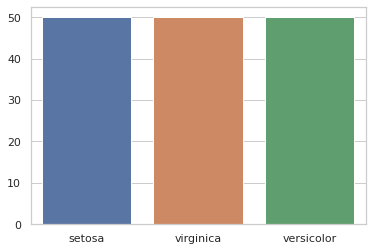

In [27]:
import matplotlib.pyplot as plt 

df2= df['species'].value_counts()
species = df2.index
count = df2.values
sns.barplot(x = species, y=count)
plt.show()

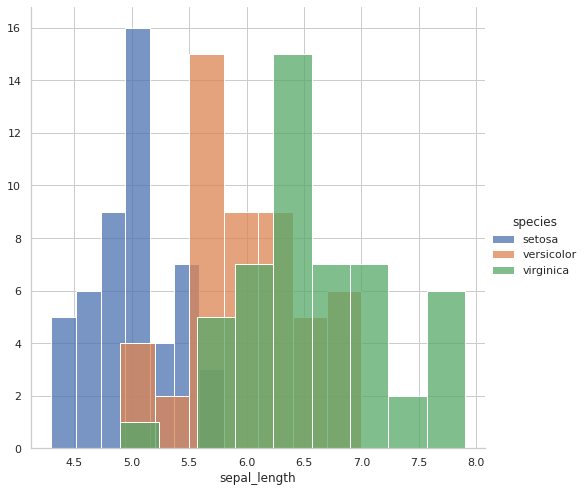

In [28]:
sns.FacetGrid(df, hue="species", height=7) \
   .map(sns.histplot, "sepal_length") \
   .add_legend()
plt.show()

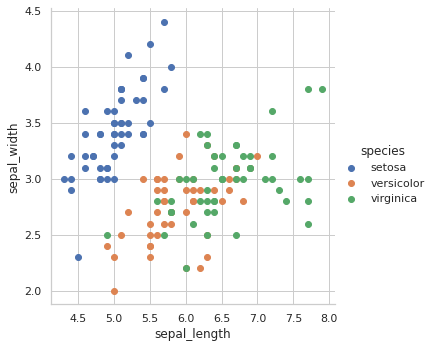

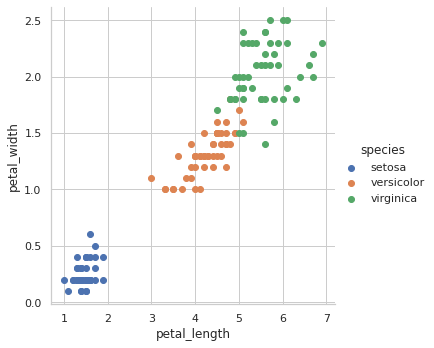

In [29]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue= 'species', height= 5)\
   .map(plt.scatter, 'sepal_length', 'sepal_width')\
   .add_legend();
sns.set_style('whitegrid');
sns.FacetGrid(df, hue= 'species', height= 5)\
   .map(plt.scatter, 'petal_length', 'petal_width')\
   .add_legend();
plt.show()

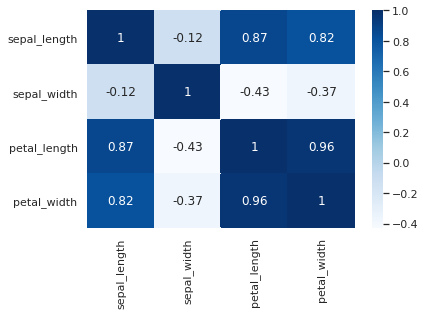

In [30]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

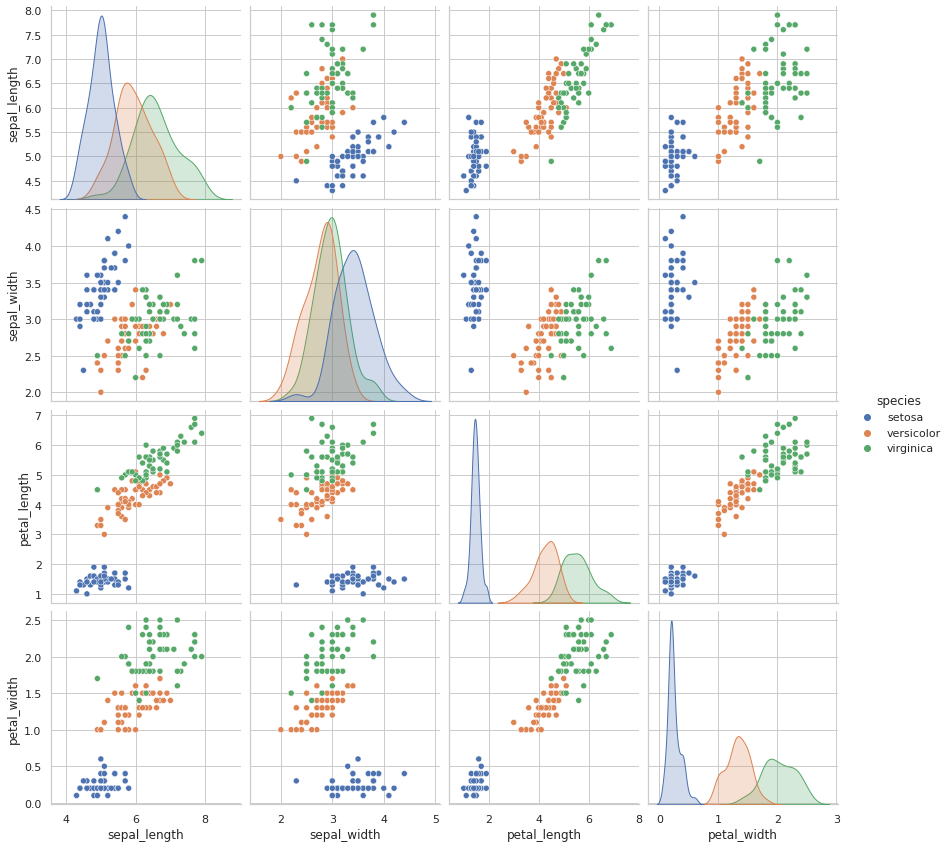

In [31]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",height=3)
plt.show()

In [42]:
import plotly.express as px

In [43]:
fig2D = px.scatter(df, x='sepal_length', y='sepal_width', color='petal_length',  
                   color_continuous_scale="blues")
fig2D.show()

In [44]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [45]:
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
fig.show()

In [46]:
fig3D = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='petal_length', symbol='species', 
                      color_continuous_scale="portland")
fig3D.show()

### Let's create your first Azure ML experiment

In [47]:
import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.core import experiment

In [48]:
experiment = Experiment(workspace=ws, name="Lab0-Settings")

### Let's log some metrics & graphs with the run.log command

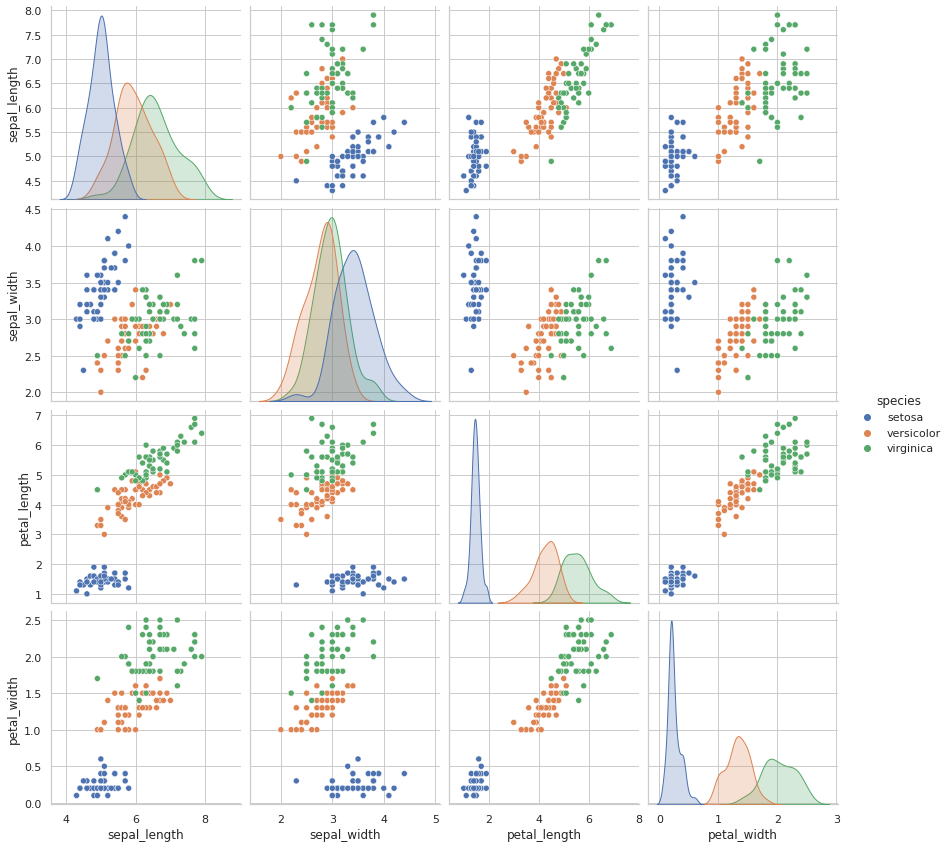

In [49]:
with experiment.start_logging(snapshot_directory=None) as run:
    fig1=sns.pairplot(df,hue="species",height=3)
    run.log_image("Graphique", plot=fig1)
    
    run.log("Number of observations", nobs)
    
    run.log("Comment", "My first Azure ML experiment")

### Let's access to the Azure ML experiment to view the results

In [50]:
experiment

Name,Workspace,Report Page,Docs Page
Lab0-Settings,AMLworkshop,Link to Azure Machine Learning studio,Link to Documentation


In [51]:
experiment.workspace

Workspace.create(name='AMLworkshop', subscription_id='70b8f39e-8863-49f7-b6ba-34a80799550c', resource_group='AMLworkshop-rg')

In [52]:
experiment.id

'44d66c97-743d-4652-bd4a-234ccfb9be18'

 You can view as well the results using the Azure ML Studio.

> You can open now the **Lab1 notebook**.

<img src="https://github.com/retkowsky/images/blob/master/Powered-by-MS-Azure-logo-v2.png?raw=true" height="300" width="300">